In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import numpy as np
from RRNN import RRNN
import matplotlib.pyplot as plt

CSAConnector: libneurosim support not available in NEST.
Falling back on PyNN's default CSAConnector.
Please re-compile NEST using --with-libneurosim=PATH
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.



### Courbes d'accord d'un ring récurrent, variation du tuning, de $W$ et de $g$

Pour démontrer notre démarche, nous allons maintenant appliquer des entrées sélectives à un réseau de connectivité aléatoire et trouver la courbe de selectivité (de type von Mises) qui correspond à la meilleure courbe d'accord sur les fréquences de décharge. Cet ajustement nous permettra de trouver un ensemble de paramètres du réseau permettant une réponse robuste aux différentes distributions d'orientation.

Pour cela, nous simulons le ring récurrent avec différentes entrées, des distributions d'orientation ayant différentes largeurs de bande. Nous mesurons le taux de décharge moyen de la population excitatrice et nous ajustons ensuite ces taux de décharge par des distributions de Von Mises. Nous repétons alors ces opérations pour différentes combinaisons du tuning, du poids global $W$ et du coupling $g$.

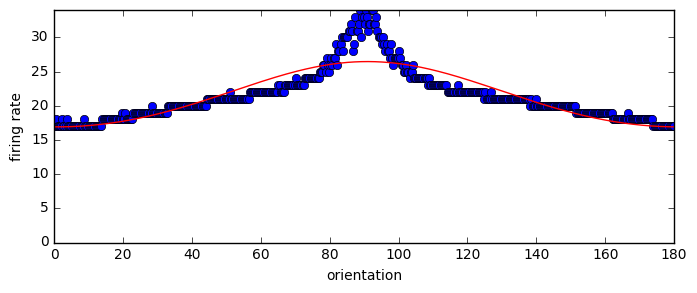

In [2]:
net = RRNN(ring=True, recurrent=True)
df, spikesE, spikesI = net.model()

theta, fr, result = net.fit_vonMises(spikesE)

fig, ax = plt.subplots(figsize=(8,3))
ax.plot(theta*180/np.pi, fr, 'bo')
#plt.plot(x, result.init_fit, 'k--')
ax.plot(theta*180/np.pi, result.best_fit, 'r-')
ax.axis('tight')
ax.set_xlabel('orientation')
ax.set_ylabel('firing rate')
ax.set_ylim(0)
plt.show()

* fit en fonction de $W$

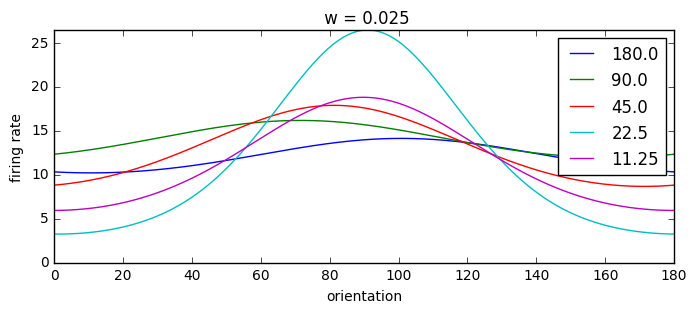

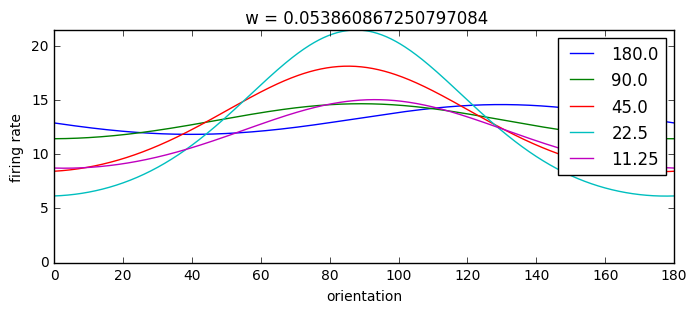

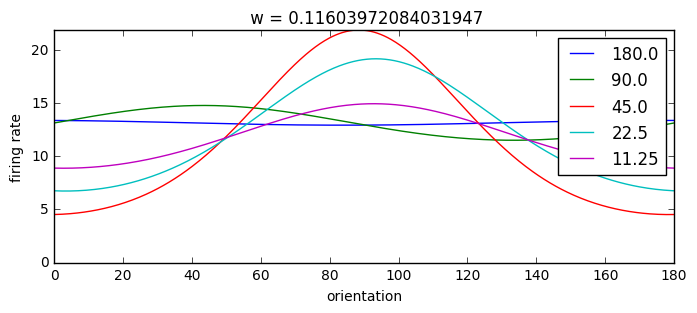

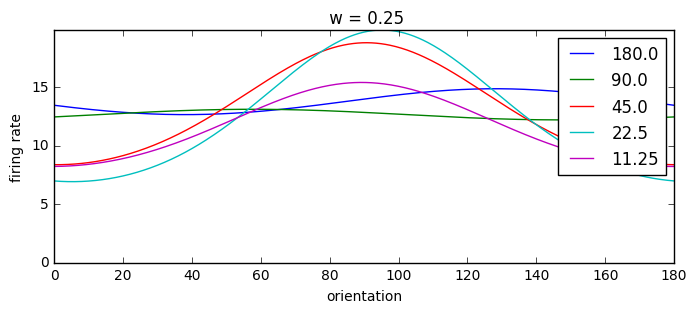

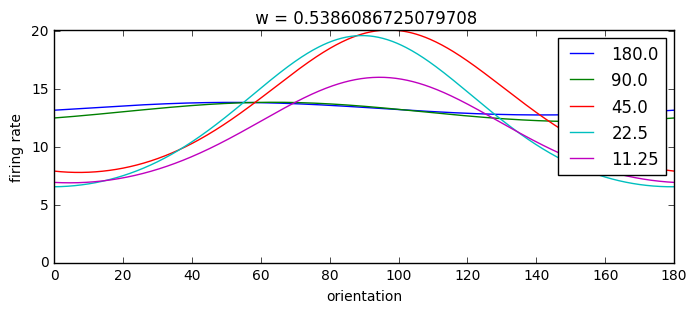

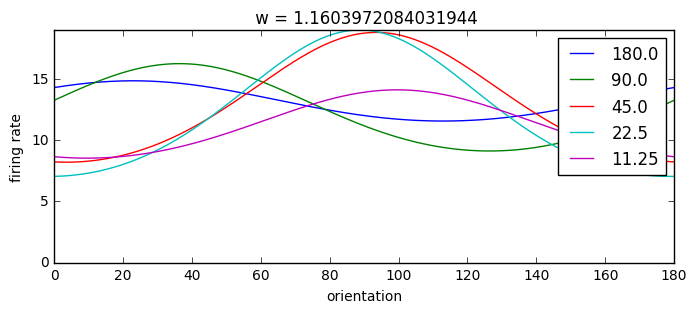

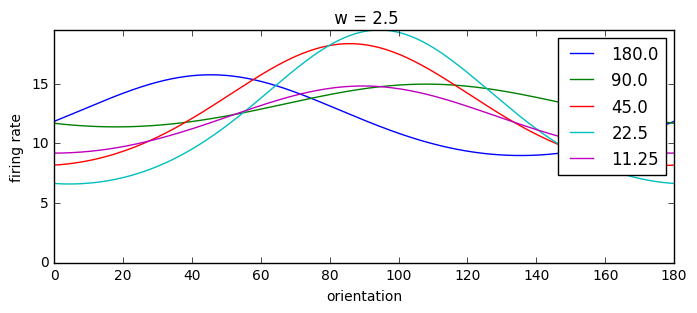

In [3]:
net = RRNN(ring=True, recurrent=True)
ws = net.w * np.logspace(-1, 1, 7)
bws = 180*np.logspace(0, -4, 5, base=2)
for w in ws:
    fig, ax = plt.subplots(1, 1, figsize=(8,3))
    for bw in bws:
        net = RRNN(ring=True, recurrent=True)
        net.sim_params['b_input'] = bw
        net.sim_params['b_exc_inh'] = 30.
        net.sim_params['b_exc_exc'] = 5.
        net.sim_params['b_inh_exc'] = 30.
        net.sim_params['b_inh_inh'] = 5.

        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        #print(result.best_fit.mean(), result.best_fit.std())
        ax.plot(theta*180/np.pi, result.best_fit, label=str(bw))

    ax.set_title(' w = {}'.format(w))
    ax.set_xlabel('orientation')
    ax.set_ylabel('firing rate')
    ax.axis('tight')
    ax.set_ylim(0)
    plt.legend()
    plt.show()

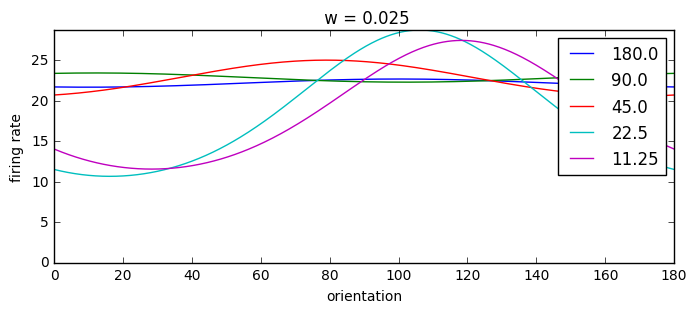

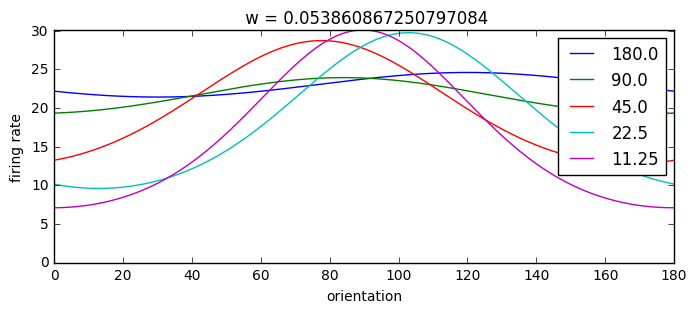

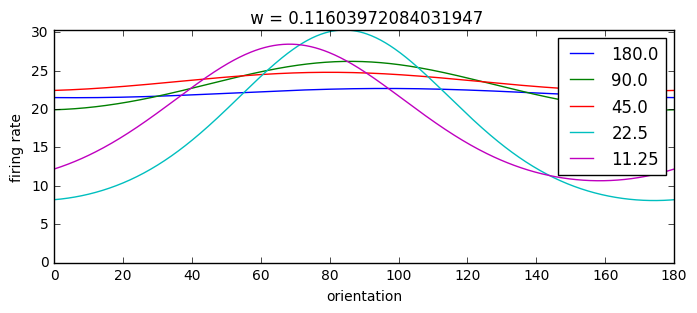

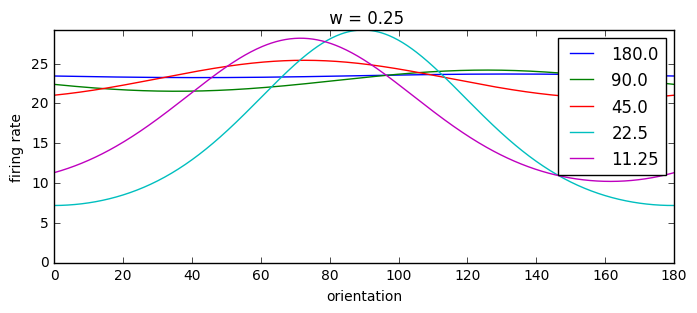

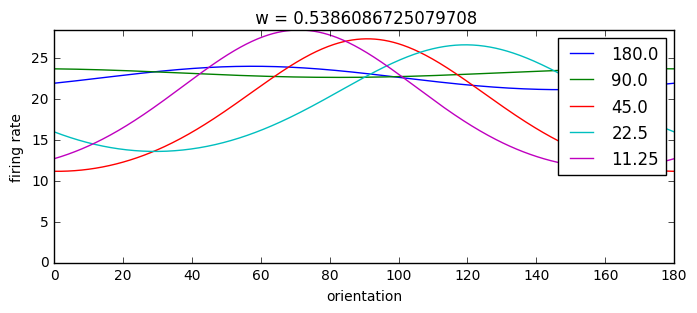

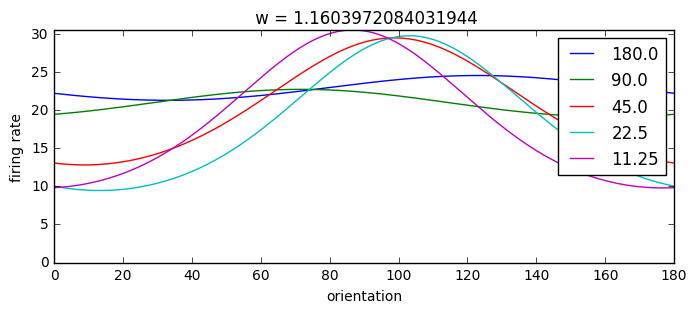

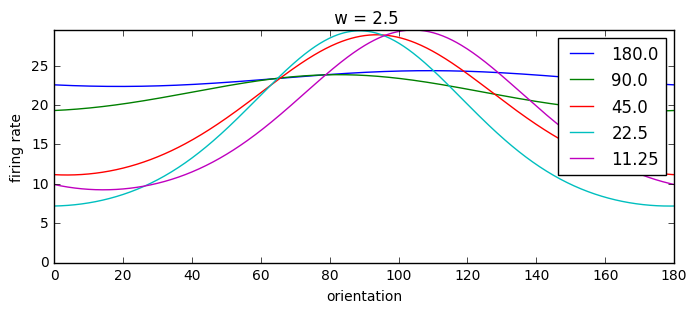

In [4]:
for w in ws:
    bws = 180*np.logspace(0, -4, 5, base=2)
    fig, ax = plt.subplots(figsize=(8,3))
    for bw in bws:
        net = RRNN(ring=True, recurrent=True)
        net.sim_params['b_input'] = bw
        net.sim_params['b_exc_inh'] = 5.
        net.sim_params['b_exc_exc'] = 15.
        net.sim_params['b_inh_exc'] = 30.
        net.sim_params['b_inh_inh'] = 15.
        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        #print(result.best_fit.mean(), result.best_fit.std())
        ax.plot(theta*180/np.pi, result.best_fit, label=str(bw))

    ax.set_title(' w = {}'.format(w))
    ax.set_xlabel('orientation')
    ax.set_ylabel('firing rate')
    ax.axis('tight')
    ax.set_ylim(0)
    plt.legend()
    plt.show()

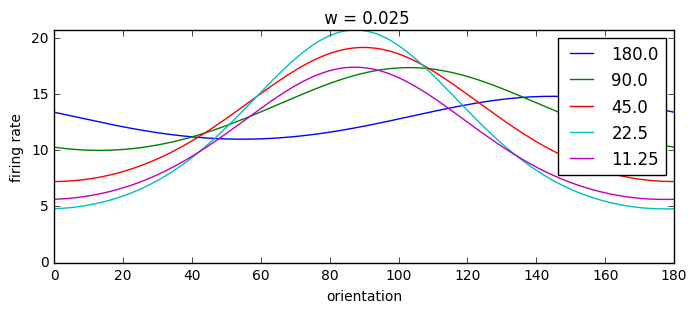

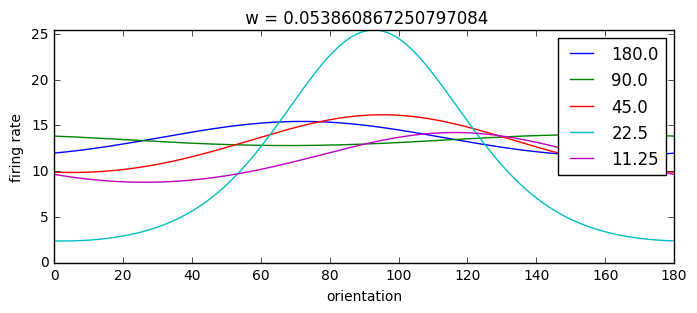

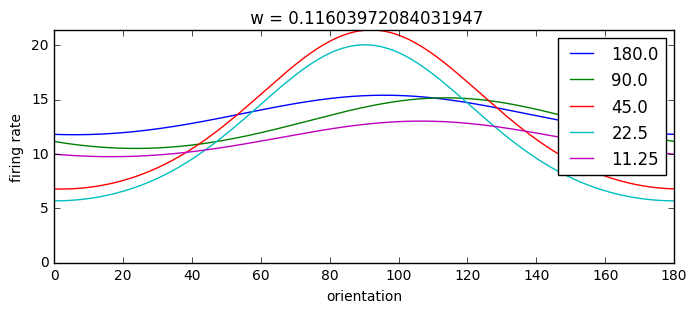

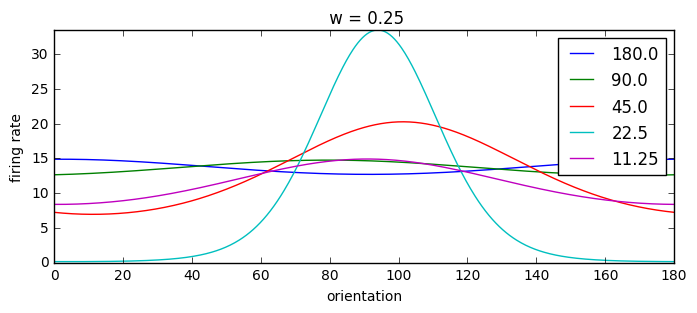

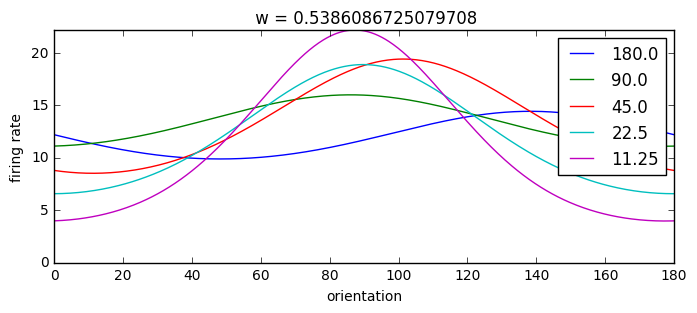

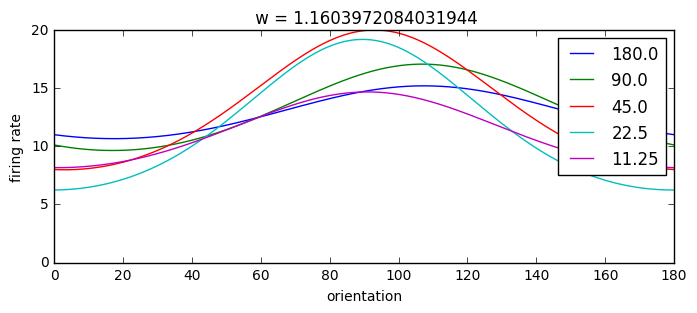

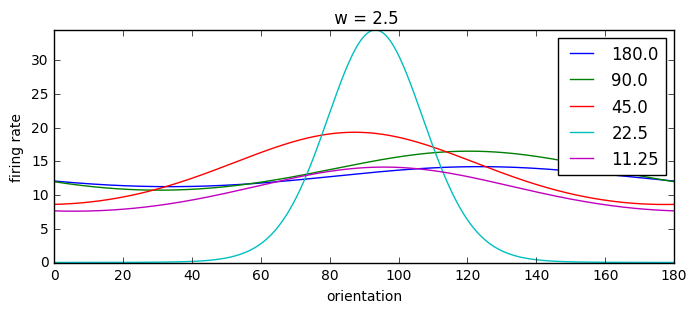

In [5]:
for w in ws:
    bws = 180*np.logspace(0, -4, 5, base=2)
    fig, ax = plt.subplots(figsize=(8,3))
    for bw in bws:
        net = RRNN(ring=True, recurrent=True)
        net.sim_params['b_input'] = bw
        net.sim_params['b_exc_inh'] = 45.
        net.sim_params['b_exc_exc'] = 5.
        net.sim_params['b_inh_exc'] = 5.
        net.sim_params['b_inh_inh'] = 5.
        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        #print(result.best_fit.mean(), result.best_fit.std())
        ax.plot(theta*180/np.pi, result.best_fit, label=str(bw))

    ax.set_title(' w = {}'.format(w))
    ax.set_xlabel('orientation')
    ax.set_ylabel('firing rate')
    ax.axis('tight')
    ax.set_ylim(0)
    plt.legend()
    plt.show()

* fit en fonction du coupling

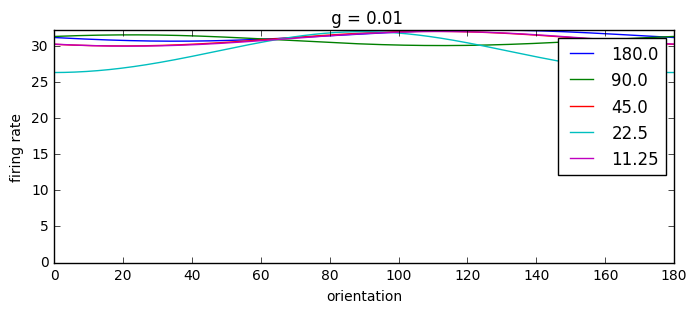

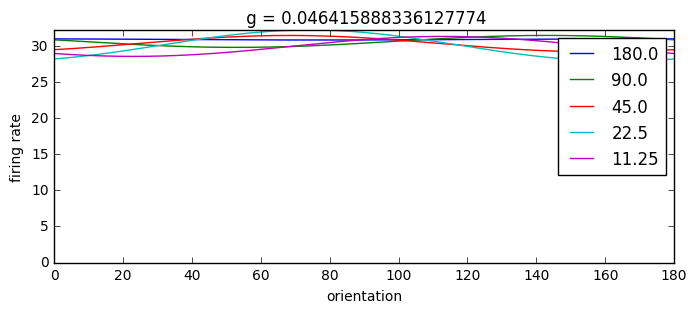

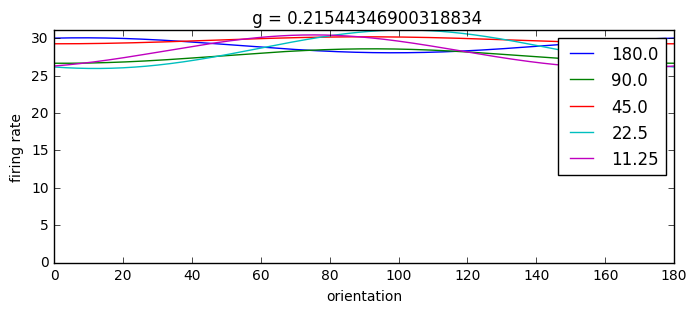

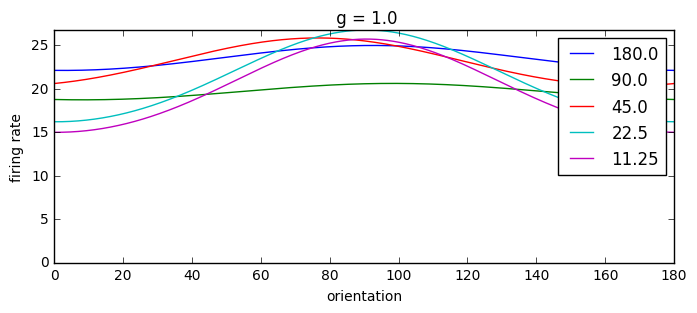

ValueError: The input contains nan values

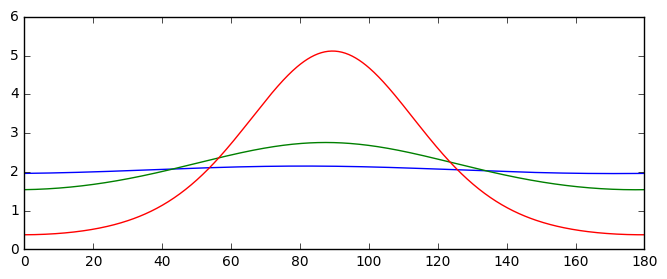

In [6]:
net = RRNN(ring=True, recurrent=True)
gs = net.g * np.logspace(-2, 2, 7)
bws = 180*np.logspace(0, -4, 5, base=2)
for g in gs:
    fig, ax = plt.subplots(figsize=(8,3))
    for bw in bws:
        net = RRNN(ring=True, recurrent=True)
        net.sim_params['b_input'] = bw

        net.g = g
        net.init_params()

        df, spikesE, spikesI = net.model()
        theta, fr, result = net.fit_vonMises(spikesE)
        #print(result.best_fit.mean(), result.best_fit.std())
        ax.plot(theta*180/np.pi, result.best_fit, label=str(bw))

    ax.set_title(' g = {}'.format(g))
    ax.set_xlabel('orientation')
    ax.set_ylabel('firing rate')
    ax.axis('tight')
    ax.set_ylim(0)
    plt.legend()
    plt.show()